# Project 1. Dimension Reduction Using SVD and PCA

### Student ID: 917910982
### Student Name: Weixiang Wang

In [17]:
# All Import Statements Defined Here
# Note: Do not change anything

import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib.image import imread

from numpy.linalg import svd
from sklearn.decomposition import PCA
import os
from sklearn.datasets import load_digits

%matplotlib inline

## Part 1. SVD Image Compression

### Load Data (do not change the code !) 

In [18]:
## image1 should be data.png, which is contained in the project zip file
## image2 should be your own colored face photo in png format named as photo.png with a size no larger than 600x600

image1 = imread(os.getcwd()+'/data.png')
image2 =  imread(os.getcwd()+'/photo.png')

image1 = image1[:,:,:3]
image2 = image2[:,:,:3]

## store the images in image_dict with name lake for image1 and name photo for image2

image_dict = {'lake':image1,'photo':image2}

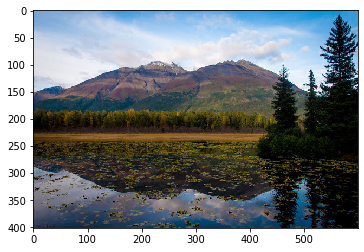

In [19]:
plt.imshow(image_dict['lake'])

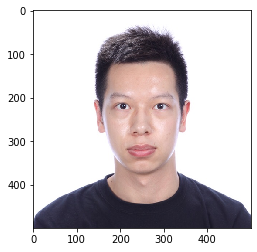

In [20]:
plt.imshow(image_dict['photo'])

In [21]:
image_dict['photo'].shape

(500, 500, 3)

<font color='red'>Add a bit of introduction to yourself here, like your name, major, year, background, interets etc.</font>

<p>My name is Weixiang Wang. I am an exchange student from Renmin University of China. I major in statistics and minor in computer science. Now I am interested in data science and machine learning.</p>

### Write a function to get the compressed matrix

In [22]:
def compress_svd(image,k):
    """
    use svd decomposition to perform image compression
    use the svd function from numpy.linalg to perfrom the svd decomposition
    use the first k singular values to reconstruct the compressed matrix
    """
    
    ## write your code here
    U,s,V = svd(image,full_matrices = False)
    compressed_image = np.dot(U[:,:k],np.dot(np.diag(s[:k]),V[:k,:]))
    
    ##end of your code
    
    return compressed_image

### Write the following functions to compress the images differently

In [23]:
def compress_show_images_reshape(image_name,k,show_image=True):
    """
    image_name (string): image name in the image_dict 
    k (int): number of singular value for image compression
    show_image (boolean): whether to plot the compressed functions
    
    Concatenate the first three layers of the image tensor into one wide matrix
    Use compress_svd function to perform svd compression
    Reshape the wide compressed matrix into an image tensor of three layers
    if show_image is true, plot the compressed image
    put the number of singular values and reconstruction error in the title
    
    return reconst_error (float), which is the mean squared error of the compressed image

    """
    
    ## your code starts here
    image = image_dict[image_name]
    original_shape=image.shape
    image_reshaped = image.reshape((original_shape[0],original_shape[1]*3))
    image_reconst = compress_svd(image_reshaped,k)
    image_reconst = image_reconst.reshape(original_shape)
    
    reconst_error = np.sum((image_reconst-image)**2)/(original_shape[0]*original_shape[1]*original_shape[2])
    
    if show_image:
        plt.title("Number of singular values = {} and reconstruction error = {:.4f}".format(k,reconst_error))
        plt.imshow(image_reconst)
    ## end of your code
    
    return reconst_error

In [24]:
def compress_show_images_separate(image_name,k,show_image=True):
    """
    image_name (string): image name in the image_dict 
    k (int): number of singular value for image compression
    show_image (boolean): whether to plot the compressed functions
    
    Use compress_svd function to perform svd compression for each of the three layers of the image tensor
    if show_image is true, plot the compressed image
    put the number of singular values and reconstruction error in the title

    return reconst_error (float), which is the mean squared error of the compressed image

    """

    ## your code starts here
    image = image_dict[image_name]
    original_shape = image.shape
    image_reconst_layers = [compress_svd(image[:,:,i],k) for i in range(3)]
    image_reconst = np.zeros(image.shape)
    for i in range(3):
        image_reconst[:,:,i] = image_reconst_layers[i]
        
    reconst_error = np.sum((image_reconst-image)**2)/(original_shape[0]*original_shape[1]*original_shape[2])
    
    if show_image:
        plt.title("Number of singular values = {} and reconstruction error = {:.4f}".format(k,reconst_error))
        plt.imshow(image_reconst)


    
    ## end of your code
    
    return reconst_error



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0.002181117221428465

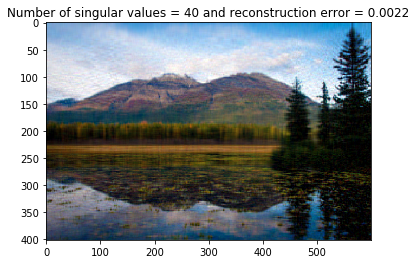

In [25]:
compress_show_images_separate('lake',40)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0.002594962133235731

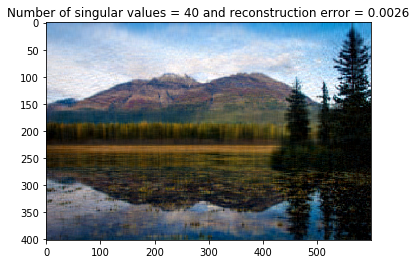

In [26]:
compress_show_images_reshape('lake',40)

### Write a function to plot the reconstruction errors and their differences 

In [27]:
def plot_error(image_name,k_min,k_max):
    """
    image_name (string): image name in the image_dict 
    k_min (int): minimum number of singular values used for image compression
    k_max (int): maximum number of singular values used for image compression

    plot the reconstruction errors using k between k_min and k_max
    use a blue line to indicate the reconstruction error using compress_show_images_reshape function
    use a orange line to indicate the reconstruction error using compress_show_images_reshape function
    in a separate subfigure, plot the difference of the reconstruction errors for each k between k_min and k_max
    
    describe briefly what you see (is one error always smaller than the other? is the difference monotonic?)
    """ 
    
    ## your code starts here
    k_range = range(k_min,k_max+1)
    reshape_error = []
    separate_error = []
    difference = []
    for k in range(k_min,k_max+1):
        reshape_error.append(compress_show_images_reshape(image_name,k,False))
        separate_error.append(compress_show_images_separate(image_name,k,False))
        difference.append(reshape_error[k-k_min]-separate_error[k-k_min])
    fig,(ax1,ax2) = plt.subplots(1,2)
    ax1.plot(k_range,reshape_error,"b")
    ax1.plot(k_range,separate_error,"#FFA500")
    ax2.plot(k_range,difference)
    
    """
    The error of compress_show_images_separate function is always smaller than 
    that of compress_show_images_reshape function for k between 2 and 20.
    The difference is monotonically decreasing.
    """
    ## end of your code


## <font color="Red"> Run the following code.</font> (do not change the code!)

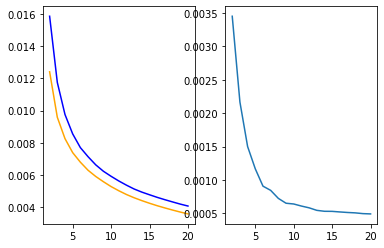

In [28]:
plot_error('lake',2,20)

In [29]:
[compress_show_images_separate('lake',k,False) for k in [1,5,10,20,30,40,20000]]

[0.018221028176326808,
 0.007389941479539523,
 0.005279084371874921,
 0.003579461824816723,
 0.002734921253346231,
 0.002181117221428465,
 2.247867040283228e-14]

In [30]:
[compress_show_images_reshape('lake',k,False) for k in [1,5,10,20,30,40,20000]]

[0.021424816293964206,
 0.008555699691645937,
 0.005917928937128593,
 0.004069459154963032,
 0.003191524946340347,
 0.002594962133235731,
 2.278471987582568e-14]

In [31]:
from ipywidgets import interact

In [32]:
interact(compress_show_images_reshape,image_name=['lake','photo'], k=(10,70))

interactive(children=(Dropdown(description='image_name', options=('lake', 'photo'), value='lake'), IntSlider(v…

<function __main__.compress_show_images_reshape(image_name, k, show_image=True)>

## Part 2. PCA of hand-written digits

### Load data

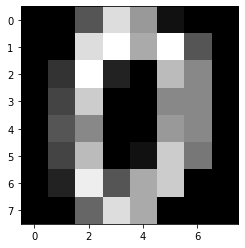

In [33]:
digits = load_digits()
plt.imshow(digits.images[0],cmap='gray') 

### Check the covariance matrix

In [34]:
mu=digits.data.mean(axis=0)
X=digits.data
X_bar=np.repeat(mu,X.shape[0]).reshape(len(mu),-1).T
cov=np.dot( (X-X_bar).T, X-X_bar )

## What do you find? Not full rank!

np.linalg.matrix_rank(cov)


61

### Now use PCA function to use a 2-dim subspace to reconstruct the digits 

In [35]:
## X_new is a list of lists which contains the first two PC for each digit
## X_inv is the reconstructed digit image with the same shape as X
## set the random_state = 12 for the PCA function ! this is important for your grade.

## your code starts here
pca = PCA(n_components=2,random_state=12)
X_new = pca.fit_transform(X)
X_inv = pca.inverse_transform(X_new)




## end here

### Plot each digits (elements in X_new) with different color labels

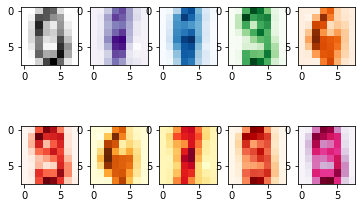

In [36]:
## your code starts here
colors = ['Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
            'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
            'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn']
fig,ax = plt.subplots(2,5)
for i in range(5):
    ax[0][i].imshow(X_inv[i].reshape(8,8),cmap=colors[i])
    ax[1][i].imshow(X_inv[i+5].reshape(8,8),cmap=colors[i+5])
## end here

### Write a function to do a side-by-side plot of the original digit and the reconstructed digit

In [37]:
def plot_digits(k):
    """
    the left part is the compressed digit, the right part is the original digit
    """
    ## your code starts here
    fig,(ax1,ax2) = plt.subplots(1,2)
    ax1.imshow(X_inv[k].reshape(8,8),cmap = "gray")
    ax2.imshow(X[k].reshape(8,8),cmap = "gray")
    
    
    ## end here

## <font color="Red"> Run the following code.</font> (do not change the code!)

In [38]:
X_inv[0]

array([ 2.18439527e-15,  1.10626914e-01,  4.44191193e+00,  1.18063215e+01,
        1.07493158e+01,  3.39833625e+00,  5.09920504e-02, -4.20291639e-02,
        2.49610241e-03,  1.69701669e+00,  1.19740914e+01,  1.16788043e+01,
        8.38141400e+00,  7.34547162e+00,  6.11223386e-01,  3.14124548e-02,
        1.94499279e-03,  3.47286485e+00,  1.40160400e+01,  5.68604617e+00,
        2.51564997e+00,  7.91668154e+00,  2.32198152e+00,  4.03119253e-02,
       -2.15810066e-04,  4.02956705e+00,  1.27804312e+01,  5.93137976e+00,
        4.63725756e+00,  8.66603267e+00,  3.63836316e+00,  2.81493730e-03,
        0.00000000e+00,  4.01350990e+00,  9.05748081e+00,  3.10220333e+00,
        4.12475708e+00,  1.22384928e+01,  5.60232331e+00,  0.00000000e+00,
        1.34385175e-02,  2.53046924e+00,  9.27133942e+00,  1.19509350e+00,
        9.92216788e-01,  1.33325823e+01,  8.13131651e+00,  5.34711306e-02,
        1.24618644e-02,  9.39578740e-01,  1.08402535e+01,  6.87893829e+00,
        7.21199881e+00,  

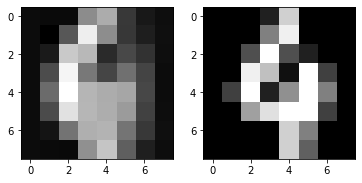

In [39]:
plot_digits(100)

# <font color="blue"> Submission Instructions</font>

1. Click the Save button at the top of the Jupyter Notebook.
2. Please make sure to have entered your SUNET ID above.
3. Select Cell -> All Output -> Clear. This will clear all the outputs from all cells (but will keep the content of ll cells). 
4. Select Cell -> Run All. This will run all the cells in order, and will take several minutes. <font color='red'>You will not get any grade if you don't follow this step strictly.</font>
5. Once you've rerun everything, select File -> Download as -> PDF via LaTeX
6. Look at the PDF file and make sure all your solutions are there, displayed correctly. The PDF is the only thing your graders will see!
7. Submit your PDF on Canvas.